In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

In [3]:
1 + 1 

2

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [4]:
from fastai.vision.all  import *
from fastdownload import FastDownload

In [5]:
!pwd

/home/harpreet/Insync/google_drive_shaannoor/Machine_Learning/2_Courses/DL_fastai/fastai_courses/fastbook/clean_harpreet/notebbooks


In [6]:
DATA_FOLDER = Path('/home/harpreet/Insync/google_drive_shaannoor/datasets')
PROJECT_FOLDER = Path('/home/harpreet/Insync/google_drive_shaannoor/Machine_Learning/2_Courses/DL_fastai/fastai_courses/fastbook/')

In [7]:
DATA_FOLDER.ls()

(#8) [Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/poldata.README.2.0'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/scaledata.README.1.0.txt'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/OpinRankDatasetWithJudgments.doc'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/WordEmbeddings'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/archive'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/OpinRankDatasetWithJudgments.pdf'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/config.ini')]

In [8]:
data_path = Path(DATA_FOLDER/'data')
model_path = Path(PROJECT_FOLDER /'clean_harpreet/models')
archive_path = Path(DATA_FOLDER/'archive')

In [101]:
d = FastDownload(base = DATA_FOLDER, archive ='archive', data = 'data')

In [102]:
d.get(URLs.PETS)

Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/oxford-iiit-pet')

In [11]:
data_path.ls()

(#23) [Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/bike-sharing-demand'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/Classification_HW'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/__MACOSX'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/mashqa_data'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/big.txt'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/hotels'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/spam.csv'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/COVID.csv'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/cars'),Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/imdb_tok')...]

In [12]:
def is_cat(p):
    return p.name[0].isupper()

In [13]:
file = data_path/'oxford-iiit-pet/images/Russian_Blue_123.jpg'
is_cat(file)

True

In [14]:
path = Path.BASE_PATH= data_path/'oxford-iiit-pet/images'

In [15]:
path.ls()

(#7393) [Path('wheaten_terrier_6.jpg'),Path('British_Shorthair_99.jpg'),Path('Bengal_189.jpg'),Path('great_pyrenees_98.jpg'),Path('boxer_165.jpg'),Path('staffordshire_bull_terrier_43.jpg'),Path('newfoundland_167.jpg'),Path('basset_hound_199.jpg'),Path('yorkshire_terrier_87.jpg'),Path('english_setter_81.jpg')...]

In [16]:
pet_block = DataBlock(blocks = [ImageBlock, CategoryBlock],
                      get_items=get_image_files,
                      get_y = is_cat,
                      item_tfms = Resize(224),
                      splitter=RandomSplitter(valid_pct=0.2, seed=42),
                     )

In [17]:
dls = pet_block.dataloaders(path)

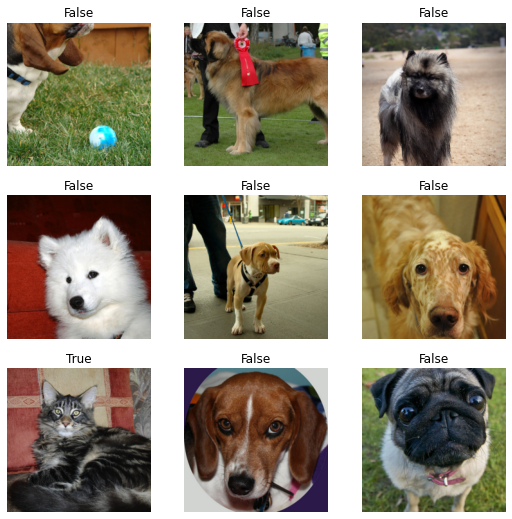

In [18]:
dls.train.show_batch()

In [19]:
pet_learner = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/harpreet/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [21]:
pet_learner.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.149725,0.025979,0.006089,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.078143,0.017798,0.005413,00:31


### Sidebar: This Book Was Written in Jupyter Notebooks

In [7]:
RandTransform
#/fastai/vision/augmnet.py --> 

fastai.vision.augment.RandTransform

In [9]:
RandTransform?

Init signature: RandTransform(self, p=1.0, nm=None, before_call=None, **kwargs)
Docstring:      A transform that before_call its state at each `__call__`
File:           /opt/conda/lib/python3.7/site-packages/fastai/vision/augment.py
Type:           _TfmMeta
Subclasses:     FlipItem, DihedralItem, RandomCrop, Resize, RandomResizedCrop, AffineCoordTfm, RandomResizedCropGPU, SpaceTfm, RandomErasing


In [10]:
RandTransform??

Init signature: RandTransform(self, p=1.0, nm=None, before_call=None, **kwargs)
Source:        
class RandTransform(DisplayedTransform):
    "A transform that before_call its state at each `__call__`"
    do,nm,supports,split_idx = True,None,[],0
    def __init__(self, p=1., nm=None, before_call=None, **kwargs):
        store_attr('p')
        super().__init__(**kwargs)
        self.before_call = ifnone(before_call,self.before_call)

    def before_call(self, b, split_idx):
        "Set `self.do` based on `self.p`"
        self.do = self.p==1. or random.random() < self.p

    def __call__(self, b, split_idx=None, **kwargs):
        self.before_call(b, split_idx=split_idx)
        return super().__call__(b, split_idx=split_idx, **kwargs) if self.do else b
File:           /opt/conda/lib/python3.7/site-packages/fastai/vision/augment.py
Type:           _TfmMeta
Subclasses:     FlipItem, DihedralItem, RandomCrop, Resize, RandomResizedCrop, AffineCoordTfm, RandomResizedCropGPU, SpaceTfm, Ran

In [22]:
path

Path('.')

In [23]:
files = get_image_files(path)
files

(#7390) [Path('wheaten_terrier_6.jpg'),Path('British_Shorthair_99.jpg'),Path('Bengal_189.jpg'),Path('great_pyrenees_98.jpg'),Path('boxer_165.jpg'),Path('staffordshire_bull_terrier_43.jpg'),Path('newfoundland_167.jpg'),Path('basset_hound_199.jpg'),Path('yorkshire_terrier_87.jpg'),Path('english_setter_81.jpg')...]

In [24]:
list(files[0:10])

[Path('wheaten_terrier_6.jpg'),
 Path('British_Shorthair_99.jpg'),
 Path('Bengal_189.jpg'),
 Path('great_pyrenees_98.jpg'),
 Path('boxer_165.jpg'),
 Path('staffordshire_bull_terrier_43.jpg'),
 Path('newfoundland_167.jpg'),
 Path('basset_hound_199.jpg'),
 Path('yorkshire_terrier_87.jpg'),
 Path('english_setter_81.jpg')]

In [25]:
type(files)

fastcore.foundation.L

In [26]:
help(L)

Help on class L in module fastcore.foundation:

class L(fastcore.basics.GetAttr, CollBase)
 |  L(items=None, *rest, use_list=False, match=None)
 |  
 |  Behaves like a list of `items` but can also index with list of indices or masks
 |  
 |  Method resolution order:
 |      L
 |      fastcore.basics.GetAttr
 |      CollBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(a, b)
 |  
 |  __addi__(a, b)
 |  
 |  __contains__(self, b)
 |  
 |  __eq__(self, b)
 |      Return self==value.
 |  
 |  __getitem__(self, idx)
 |      Retrieve `idx` (can be list of indices, or mask, or int) items
 |  
 |  __init__(self, items=None, *rest, use_list=False, match=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __invert__(self)
 |  
 |  __iter__(self)
 |  
 |  __mul__(a, b)
 |  
 |  __radd__(a, b)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __reversed__(self)
 |  
 |  __setitem__(self, idx, o)
 |      Set `idx` (can be list o

In [27]:
doc(L)

class L [source] L ( items = None , * rest , use_list = False , match = None ) :: GetAttr 
 
 Behaves like a list of items but can also index with list of indices or masks 
 Show in docs

In [28]:
a = [1, 2,3]
a

[1, 2, 3]

In [29]:
a[:2]

[1, 2]

In [30]:
b = L(1,2,3)
b

(#3) [1,2,3]

In [31]:
b[:2]

(#2) [1,2]

In [32]:
b[[0, 2]]

(#2) [1,3]

In [33]:
a[[0, 2]]

TypeError: list indices must be integers or slices, not list

In [34]:
c = array([1,2,3])

In [35]:
c[[0, 2]]

array([1, 3])

In [36]:
b + ['hello']

(#4) [1,2,3,'hello']

In [37]:
a+ ['hello']

[1, 2, 3, 'hello']

In [38]:
c+['hello']

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U5')) -> None

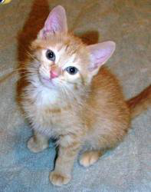

In [43]:
img_file = PROJECT_FOLDER/'images/chapter1_cat_example.jpg'
img = PILImage.create(img_file)
img.to_thumb(192)

### End sidebar

In [44]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = [img_file])

In [45]:
img = PILImage.create(uploader.data[0])
is_cat, pred_idxs ,probs = pet_learner.predict(img) 
print(is_cat, pred_idxs ,probs)

True TensorBase(1) TensorBase([4.9788e-05, 9.9995e-01])


In [46]:
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[pred_idxs].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999950


### What Is Machine Learning?

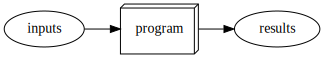

In [47]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

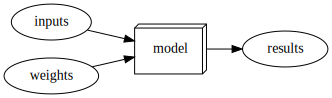

In [48]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

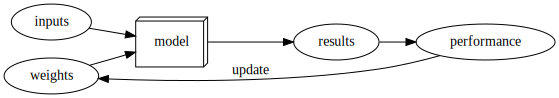

In [49]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

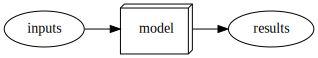

In [50]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

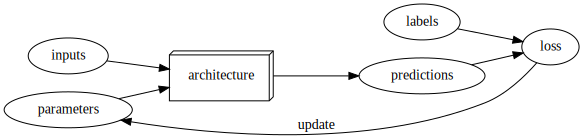

In [51]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

### Image Segmentation

In [52]:
d.get(URLs.CAMVID_TINY)

Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/camvid_tiny')

In [168]:
path = Path.BASE_PATH = data_path/'camvid_tiny'

In [54]:
path.ls()

(#3) [Path('labels'),Path('images'),Path('codes.txt')]

In [55]:
image_files = get_image_files(path/'images')

In [56]:
img_file = image_files[10]
img_file

Path('images/0001TP_008940.png')

In [57]:
img= PILImage.create(img_file)

<AxesSubplot:>

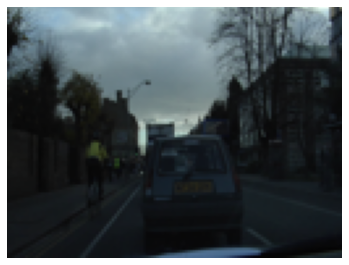

In [58]:
img.show(figsize=(6,6))

In [59]:
img_file

Path('images/0001TP_008940.png')

In [60]:
img_file.suffix

'.png'

In [61]:
img_file.stem

'0001TP_008940'

In [63]:
mask_file = path/'labels'/f'{img_file.stem}_P{img_file.suffix}'
mask_file

Path('labels/0001TP_008940_P.png')

<AxesSubplot:>

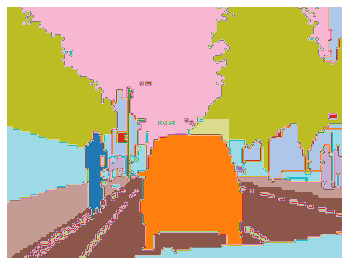

In [64]:
mask = PILMask.create(mask_file)
mask.show(figsize=(6, 6), alpha=1)

In [65]:
def get_mask_file_path(img_file_path):
    return path/'labels'/f'{img_file_path.stem}_P{img_file_path.suffix}'    

In [66]:
codes = np.loadtxt(path/'codes.txt', dtype='str'); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [67]:
camvid_block = DataBlock(blocks = [ImageBlock, MaskBlock(codes)],
                         get_items = get_image_files,
                         get_y = get_mask_file_path,
                         splitter=RandomSplitter(valid_pct=0.2, seed = 42),
                        )                          

In [68]:
dls_camvid = camvid_block.dataloaders(path/'images', bs=8)

/home/harpreet/mambaforge/lib/python3.9/site-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/home/harpreet/mambaforge/lib/python3.9/site-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


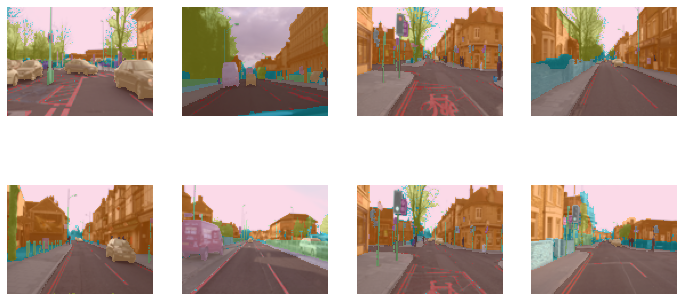

In [169]:
dls_camvid.train.show_batch()

In [75]:
learner_camvid = unet_learner(dls_camvid, resnet34)

In [76]:
learner_camvid.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.013097,2.679090,00:02


epoch,train_loss,valid_loss,time
0,1.830495,1.417451,00:02
1,1.613765,1.272688,00:02
2,1.474171,1.064759,00:02
3,1.315438,0.838336,00:02
4,1.177198,0.800086,00:02
5,1.062086,0.750160,00:02
6,0.970006,0.701232,00:02
7,0.898368,0.702379,00:02


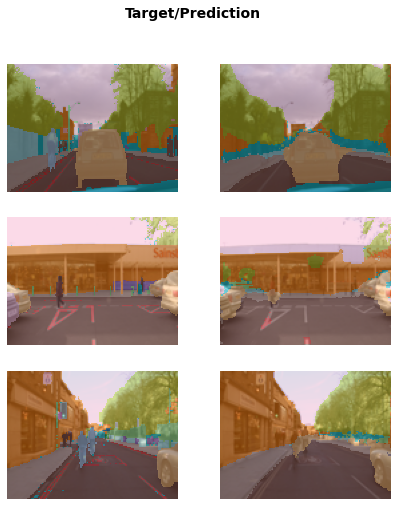

In [77]:
learner_camvid.show_results(max_n=3, figsize=(7,8))

In [103]:
path = Path.BASE_PATH = data_path/'imdb'

In [104]:
path.ls()

(#7) [Path('tmp_clas'),Path('tmp_lm'),Path('README'),Path('train'),Path('imdb.vocab'),Path('test'),Path('unsup')]

In [115]:
(path/'train').ls()

(#4) [Path('train/unsupBow.feat'),Path('train/neg'),Path('train/pos'),Path('train/labeledBow.feat')]

### Text Classification

In [204]:
from fastai.text.all import *

In [205]:
base = DATA_FOLDER
path = untar_data(URLs.IMDB, data = base/'data', archive = base/'archive' )
path

Path('.')

In [206]:
path = Path.BASE_PATH = DATA_FOLDER/'data/imdb'

In [207]:
path.ls()

(#7) [Path('tmp_clas'),Path('tmp_lm'),Path('README'),Path('train'),Path('imdb.vocab'),Path('test'),Path('unsup')]

In [208]:
!mv {path/'test'} {path/'other'}

In [209]:
from IPython.utils import io
def move_and_create(files, path, folder):
    for o in files: 
        pname = o.parent.name
        p = path/folder/pname
        p.mkdir(exist_ok=True, parents=True)
        with io.capture_output() as captured:
            shutil.move(o, p)

In [210]:
def create_train_valid_folders(path, test_size):
    training_files = get_text_files(path/'other')
    labels = [parent_label(o) for o in training_files]
    splitter = TrainTestSplitter(test_size=test_size, random_state=42, stratify=labels)
    train_file_idxs, valid_file_idxs  = splitter(training_files)
    train_files_init = training_files[train_file_idxs]
    valid_files_init = training_files[valid_file_idxs]
    folders =['test', 'valid']
    file_set = [train_files_init, valid_files_init]
    for files, folder in zip(file_set, folders):
        move_and_create(files, path, folder)
 
    for f in (path/'other').iterdir():
        if  f.is_dir():
            if len(Path(f).ls()) ==0:
                f.rmdir()    

In [211]:
 create_train_valid_folders(path, test_size=0.5)

In [212]:
print(len((path/'valid/neg').ls()), len((path/'valid/pos').ls()))

6250 6250


In [213]:
print(len((path/'train/neg').ls()), len((path/'train/pos').ls()))

12500 12500


In [214]:
print(len((path/'test/neg').ls()), len((path/'test/pos').ls()))

6250 6250


In [215]:
dls_imdb = DataBlock(blocks = (TextBlock.from_folder(path), CategoryBlock),
                      get_items=partial(get_text_files, folders = ['train', 'valid']),
                      get_y = parent_label,
                      splitter = GrandparentSplitter(valid_name='valid'),
                      ).dataloaders(path, bs = 32)

In [216]:
dls_imdb.train.show_batch()

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) assistants in fine xxmaj bikinis were all definite selling points for "" sea xxup xxunk - 61 ) . \n\n xxmaj just what was the reason for producing a sort of sea going "" gun for hire "" * series . xxmaj let 's look closely now . xxmaj there must be a some clues around . \n\n xxmaj if we were to look back just a little , we see the xxup rko xxmaj radio xxmaj pictures production of xxup underwater ! ( 1955 ) . xxmaj it starred xxmaj jane xxmaj russell , xxmaj gilbert xxmaj roland , xxmaj richard xxmaj egan and xxmaj lori xxmaj nelson as",pos
2,"xxbos xxmaj hear are some of the interesting things our combat hero faith healer xxmaj pat , his son xxmaj gordon ( t.v . ministry seems like a family business . ) and xxmaj terry xxmaj xxunk ( won xxmaj miss xxmaj america in 1973 by wearing a swimsuit and showing her legs . xxmaj oh my goodness gracious ! ) say when our poor viewers are sick and need help . \n\n 1 . xxmaj someone with an "" xxunk right xxunk just now been xxunk . xxmaj someone with "" twisted intestines "" has been xxunk xxmaj terry said there was a person with a "" strange xxunk mean xxmaj god does n't know ? ) a burning in the legs , who has just been xxunk . xxmaj then xxmaj gordon said there 's a xxunk narrows it down ! ) with swelling of the xxunk in",neg
3,"xxbos xxup warning : xxup possible xxup spoilers ( not that you should care . xxmaj also , sorry for the caps . ) \n\n xxmaj starting with an unnecessarily dramatic voice that 's all the more annoying for talking nonsense , it goes on with nonsense and unnecessary drama . xxmaj that 's badly but accurately put . \n\n xxmaj we know space travel is a risky enterprise . xxmaj there 's a complicated system with a lot of potential for malfunctions , radiation , stress - related symptoms etc , and unexpected things are bound to happen in largely unknown environments . xxmaj they knew stuff could go wrong . xxmaj in fact , stuff had gone wrong . xxmaj it 's called learning . xxmaj granted , xxmaj appollo 11 was n't safe by today 's standards and there was immense political pressure , but the overall",neg
4,"xxbos xxmaj within the realm of xxmaj science xxmaj fiction , two particular themes consistently elicit interest , were initially explored in the literature of a pre - cinematic era , and have since been periodically revisited by filmmakers and writers alike , with varying degrees of success . xxmaj the first theme , that of time travel , has held an unwavering fascination for fans of film , as well as the written word , most recently on the screen with yet another version of the xxup h.g . xxmaj wells classic , ` the xxmaj time xxmaj machine . ' xxmaj the second theme , which also manages to hold audiences in thrall , is that of invisibility , which sparks the imagination with it 's seemingly endless and myriad possibilities . xxmaj and this theme , too , has again become the basis for a film adapted",neg
5,"xxbos xxmaj main theme in this 

In [217]:
import gc
gc.collect
torch.cuda.empty_cache()
print(torch.cuda.list_gpu_processes())

GPU:0
process      38018 uses     2735.000 MB GPU memory


In [218]:
learn = text_classifier_learner(dls_imdb, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.481511,0.392969,0.823840,02:17


epoch,train_loss,valid_loss,accuracy,time
0,0.298185,0.252768,0.894240,04:49
1,0.237130,0.206721,0.917920,04:51
2,0.189822,0.188667,0.929040,04:54
3,0.147292,0.192263,0.932640,04:53


In [219]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0029, 0.9971]))

### Tabular Data

In [11]:
from fastai.tabular.all import *

In [12]:
base = DATA_FOLDER
path = untar_data(URLs.ADULT_SAMPLE, data = base/'data', archive = base/'archive' )
path

Path('/home/harpreet/Insync/google_drive_shaannoor/datasets/data/adult_sample')

In [13]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378202,0.373804,0.831388,00:03
1,0.357103,0.354383,0.835688,00:02
2,0.351470,0.351186,0.839988,00:02


### Recommendation Systems

In [15]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497563,1.419108,00:00


epoch,train_loss,valid_loss,time
0,1.348368,1.360463,00:00
1,1.248621,1.178440,00:00
2,1.010771,0.876555,00:00
3,0.791824,0.746206,00:00
4,0.690008,0.717330,00:00
5,0.641033,0.709639,00:00
6,0.629534,0.706519,00:00
7,0.610997,0.704522,00:00
8,0.603987,0.703974,00:00
9,0.603293,0.703902,00:00


In [16]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,44.0,72.0,5.0,3.459052
1,13.0,51.0,4.0,4.119843
2,62.0,65.0,4.0,3.665025
3,40.0,53.0,5.0,3.804961
4,19.0,16.0,4.5,4.498744
5,15.0,5.0,4.5,3.444189
6,83.0,10.0,2.0,2.451943
7,55.0,14.0,5.0,4.391811
8,63.0,26.0,3.0,2.967124


### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?

   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F
   
1. Name five areas where deep learning is now the best in the world.
1. What was the name of the first device that was based on the principle of the artificial neuron?
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
1. What were the two theoretical misunderstandings that held back the field of neural networks?
1. What is a GPU?
1. Open a notebook and execute a cell containing: `1+1`. What happens?
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.
1. Why is it hard to use a traditional computer program to recognize images in a photo?
1. What did Samuel mean by "weight assignment"?
1. What term do we normally use in deep learning for what Samuel called "weights"?
1. Draw a picture that summarizes Samuel's view of a machine learning model.
1. Why is it hard to understand why a deep learning model makes a particular prediction?
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
1. What do you need in order to train a model?
1. How could a feedback loop impact the rollout of a predictive policing model?
1. Do we always have to use 224×224-pixel images with the cat recognition model?
1. What is the difference between classification and regression?
1. What is a validation set? What is a test set? Why do we need them?
1. What will fastai do if you don't provide a validation set?
1. Can we always use a random sample for a validation set? Why or why not?
1. What is overfitting? Provide an example.
1. What is a metric? How does it differ from "loss"?
1. How can pretrained models help?
1. What is the "head" of a model?
1. What kinds of features do the early layers of a CNN find? How about the later layers?
1. Are image models only useful for photos?
1. What is an "architecture"?
1. What is segmentation?
1. What is `y_range` used for? When do we need it?
1. What are "hyperparameters"?
1. What's the best way to avoid failures when using AI in an organization?

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.